# Excercise 3

ex3 and ex4

In [23]:
from skimage.feature import local_binary_pattern
from skimage import io
from os.path import join, abspath
from os import walk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import random

## Parameters for local binary pattern (LBP)

In [24]:
METHOD = "default"
radius = 2
n_points = 8 * radius

## Utility functions

#### absolute_file_paths
Reads all files for given directory and returns absolute file paths

In [25]:
def absolute_file_paths(directories):
    for directory in directories:
        for dirpath, _, filenames in walk(directory):
            for f in filenames:
                yield abspath(join(dirpath, f))

#### get_histogram

For given imagePath
1. Reads imageFile
2. Creates LBP (local binary pattern) for imageFile
3. Returns histogram for LBP

In [26]:
def get_histogram(imgPath):
    image = io.imread(imgPath)
    lbp = local_binary_pattern(image, n_points, radius, METHOD)
    n_bins = int(lbp.max() + 1)
    (hist, _) = np.histogram(lbp.ravel(), normed=True, bins=n_bins)
    return hist

#### plot_image_with_histogram

Chooses 3 random images from dataset and plots image and its histogram 

In [27]:
def plot_image_with_histogram(sample_images, title):
    # Randomly pick three images
    images = random.sample(sample_images, 3)
    lbps = []
    for img in images:
        lbps.append(local_binary_pattern(img, n_points, radius, METHOD))

    fig, (ax_img, ax_lbp) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
    fig.suptitle(title, fontsize=16)
    plt.gray()

    for idx, (axi, axl) in enumerate(zip(ax_img, ax_lbp)):
        axi.imshow(images[idx])
        axl.imshow(lbps[idx])

    plt.show()

## Classification problem 

Read traffic sign images from both classes.
Create dataset from LBP histograms and train models with different classifiers KNN, LDA, SVC

In [30]:
X = []
Y = []
images1 = [];
images2 = [];
imageFileNamesClass1 = absolute_file_paths(["./data/GTSRB_subset/class1"])
for imgPath in imageFileNamesClass1:
    image = io.imread(imgPath)
    images1.append(image)
    X.append(get_histogram(imgPath))
    Y.append(0)
    
imageFileNamesClass2 = absolute_file_paths(["./data/GTSRB_subset/class2"])
for imgPath in imageFileNamesClass2:
    image = io.imread(imgPath)
    images2.append(image)
    X.append(get_histogram(imgPath))
    Y.append(1)

plot randomly three images and corresponding LBP from both datasets 

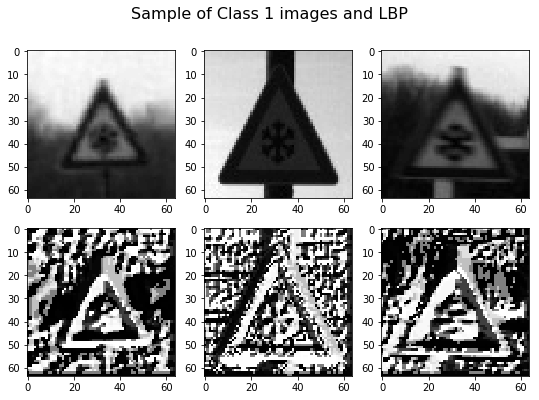

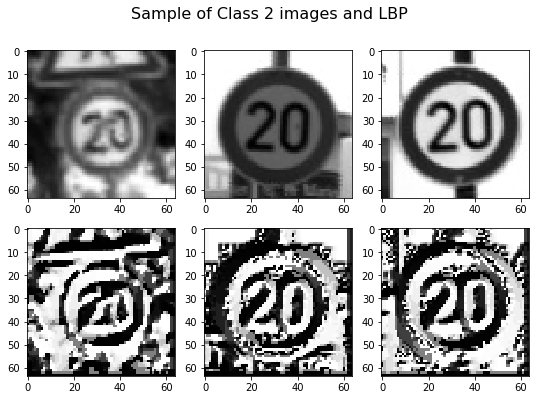

In [31]:
plot_image_with_histogram(images1, "Sample of Class 1 images and LBP")
plot_image_with_histogram(images2, "Sample of Class 2 images and LBP")

split dataset to training 80% and cross validation 20%
Train models and predict

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.80)

bestScore = 0
bestClf = ""
for CLF in [KNeighborsClassifier, LinearDiscriminantAnalysis, SVC]:
    clf = CLF()
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    name = CLF.__name__
    if score > bestScore:
        bestScore = score
        bestClf = name
    print("Score for", name, ":", score)
print("=========")
print("Best classifier is:", bestClf, "with score of:", bestScore)

Score for KNeighborsClassifier : 0.895061728395


/Users/jope/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Score for LinearDiscriminantAnalysis : 0.487654320988
Score for SVC : 0.475308641975
Best classifier is: KNeighborsClassifier with score of: 0.895061728395
